# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [8]:
# you are free to use any package you deem fit
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Dataset

In [2]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

## Training

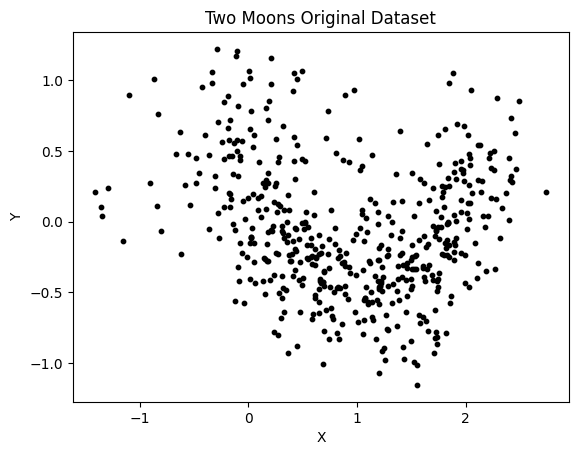

Accuracy on training set:  0.98


Text(0.5, 1.0, 'Training set of moons dataset')

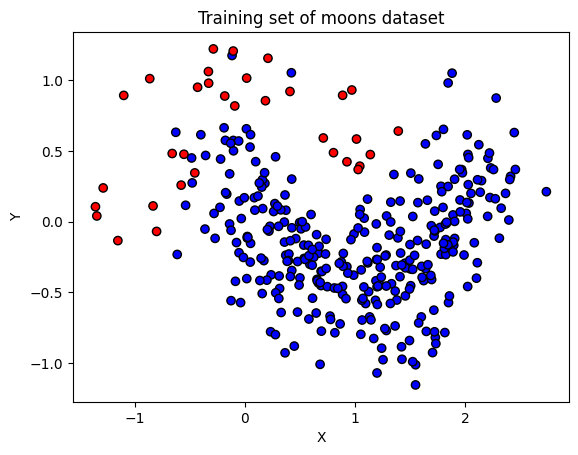

In [3]:
# First, lets see the data we are working with before we decide what algorithm to train the model on
plt.scatter(X[:, 0], X[:, 1], s = 10, color = 'black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Two Moons Original Dataset")
plt.show()
plt.clf()
# There are two half circles in this data set in which we should classify (the upper half-circle on the left and the lower half-circle on the right)
# We need to make a model that can predict which half-circle the data point is classified as.
# Since this dataset is quite noisy, a decision tree would be hard to implement since it is sensitive to new data. Let's try a random forest.
moons_classifier = RandomForestClassifier(n_estimators = 30, max_depth = 5, max_features = 1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=0)
moons_classifier.fit(X_train, y_train)
accuracy = moons_classifier.score(X_train, y_train)
print("Accuracy on training set: ", accuracy)
moons_colors = ListedColormap(["red","blue"])
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = moons_colors, edgecolors = 'k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Training set of moons dataset")

## Testing / Optimization

Feature importances:  [0.48679993 0.51320007]


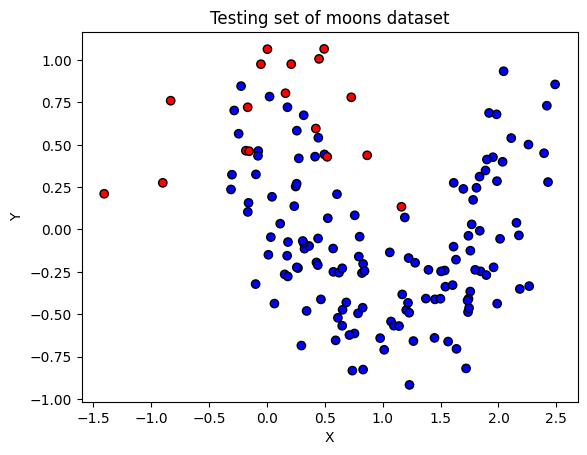

In [4]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = moons_colors, edgecolors = 'k')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Testing set of moons dataset")
feature_importances = moons_classifier.feature_importances_
print("Feature importances: ", feature_importances)

## Performance Analysis

Testing set accuracy of moons dataset:  0.9266666666666666
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        17
           1       0.94      0.98      0.96       133

    accuracy                           0.93       150
   macro avg       0.87      0.73      0.78       150
weighted avg       0.92      0.93      0.92       150



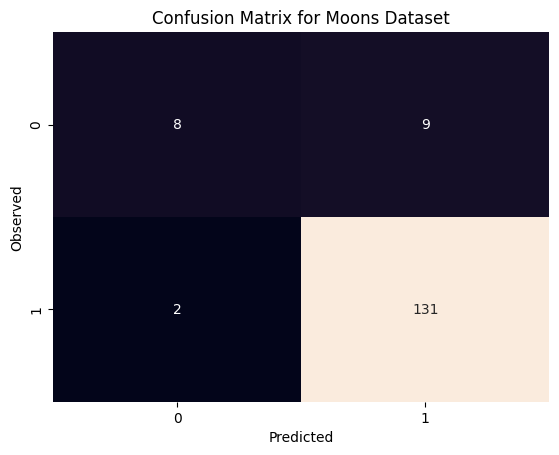

In [14]:
y_pred = moons_classifier.predict(X_test)
# Evaluating the accuracy of the model
test_score = accuracy_score(y_pred, y_test)
print("Testing set accuracy of moons dataset: ", test_score)
# Create confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred)
sb.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.title("Confusion Matrix for Moons Dataset")
# Classification report
class_rep = classification_report(y_test, y_pred)
print(class_rep)
# As we can see from the confusion matrix below, the vast majority of the data points were predicted correctly
# with 9 reported Type I Errors and only 2 reported Type II Errors, thus this model is a sufficient predictor for the dataset.